<a href="https://colab.research.google.com/github/michelucci/zhaw-dlcourse-spring2019/blob/master/Week%204%20-%20One%20Neuron/Week_4_MNIST_with_Logistic_Regression_and_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/zhaw-dlcourse-spring2019

Spring Semester 2019

# Python implementation of Logistic Regression with tensorflow

### Abstract

In this notebook I develop a complete version of Logistic Regression with one neuron. I apply the model to a subset of MNIST data containing only the digits 1 and 2 (see the data preparation part to see how to do it) to do binary classification. 

## Libraries

In [0]:
import numpy as np
from sklearn.datasets import fetch_mldata

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

## Data preparation

To get MNIST data we use the function fetch_mldata, in the datasets package. Let's get all the dataset, and then we will select only the digits we want.

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [0]:
Xinput_,yinput_ = x_train, y_train

Xinput_ = x_train.reshape(60000,784)
yinput_ = y_train.reshape(60000,)

#X,y = mnist["data"], mnist["target"]

X = Xinput_
y = yinput_

To know how many digits we have we can run this simple code

In [5]:
total = 0
for i in range(10):
    print ("digit", i, "appear", np.count_nonzero(y == i), "times")

digit 0 appear 5923 times
digit 1 appear 6742 times
digit 2 appear 5958 times
digit 3 appear 6131 times
digit 4 appear 5842 times
digit 5 appear 5421 times
digit 6 appear 5918 times
digit 7 appear 6265 times
digit 8 appear 5851 times
digit 9 appear 5949 times


In [6]:
total = 0
for i in range(10):
    print ("digit", i, "makes", np.around(np.count_nonzero(y == i)/60000.0*100.0, decimals=1), "% of the 60000 observations")

digit 0 makes 9.9 % of the 60000 observations
digit 1 makes 11.2 % of the 60000 observations
digit 2 makes 9.9 % of the 60000 observations
digit 3 makes 10.2 % of the 60000 observations
digit 4 makes 9.7 % of the 60000 observations
digit 5 makes 9.0 % of the 60000 observations
digit 6 makes 9.9 % of the 60000 observations
digit 7 makes 10.4 % of the 60000 observations
digit 8 makes 9.8 % of the 60000 observations
digit 9 makes 9.9 % of the 60000 observations


# Let's check the distribution if we create a dev dataset

In [7]:
np.random.seed(42)
rnd = np.random.rand(len(y)) < 0.8

train_y = y[rnd]
dev_y = y[~rnd]

print(train_y.shape)
print(dev_y.shape)

(48061,)
(11939,)


Note: datasets loaded by scikit-learn have a dictionary structure. 

- a DESCR structure describing the dataset
- a ```data``` key containing an array with one row per instance and one column per feature
- a ```target``` with an array with the labels

we have 70000 digits available, from 0 to 9. Let's define a helper function that will allow us to visualize the digits.

In [8]:
total = 0
for i in range(10):
    print ("digit", i, "makes", np.around(np.count_nonzero(train_y == i)/56056.0*100.0, decimals=1), "% of the 56056 observations")

digit 0 makes 8.5 % of the 56056 observations
digit 1 makes 9.7 % of the 56056 observations
digit 2 makes 8.5 % of the 56056 observations
digit 3 makes 8.7 % of the 56056 observations
digit 4 makes 8.3 % of the 56056 observations
digit 5 makes 7.8 % of the 56056 observations
digit 6 makes 8.5 % of the 56056 observations
digit 7 makes 9.0 % of the 56056 observations
digit 8 makes 8.4 % of the 56056 observations
digit 9 makes 8.4 % of the 56056 observations


In [9]:
total = 0
for i in range(2):
    print ("class", i, "makes", np.around(np.count_nonzero(dev_y == i)/13944.0*100.0, decimals=1), "% of the 13944 observations")

class 0 makes 8.5 % of the 13944 observations
class 1 makes 9.5 % of the 13944 observations


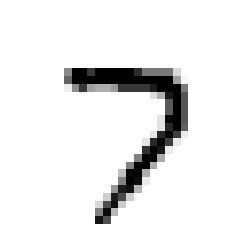

In [10]:
def plot_digit(some_digit):
    
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()
    
plot_digit(X[36003])

Let's check the relative label...

In [11]:
y[36003]

7

### Train and test set preparation

Let's first reduce our dataset only to 1 and 2 digits.

In [0]:
X_train = X[np.any([y == 1,y == 2], axis = 0)]
y_train = y[np.any([y == 1,y == 2], axis = 0)]

The size of our dataset is

In [13]:
print(X_train.shape)
print(y_train.shape)

(12700, 784)
(12700,)


In our reduced dataset how many 1 and 2 do we have?

In [14]:
print("number of 1:", np.count_nonzero(y_train == 1))
print("number of 2:", np.count_nonzero(y_train == 2))

number of 1: 6742
number of 2: 5958


In [0]:
X_train_normalised = X_train # Not necessary here. The data is already normalized

Remember that we need features along the rows, and training cases along the columns. So let's reshape our dataset

In [16]:
X_train_tr = X_train_normalised.transpose()
y_train_tr = y_train.reshape(1,y_train.shape[0])

print(X_train_tr.shape)
print(y_train_tr.shape)

n_dim = X_train_tr.shape[0]
dim_train = X_train_tr.shape[1]


print(n_dim)
print("The training dataset has", dim_train, "observations (m).")

(784, 12700)
(1, 12700)
784
The training dataset has 12700 observations (m).


We will need to rescale our lables. Remember we will compare them in the cost function with 0 and 1 (proabilities) and therefore our class labels must be 0 and 1, not 1 and 2. So the following step take care of it.

In [0]:
y_train_shifted = y_train_tr - 1

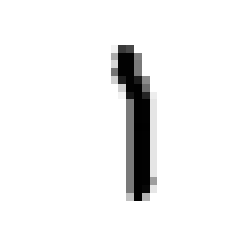

[0]


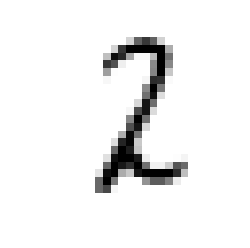

[1]


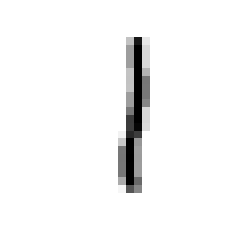

[0]


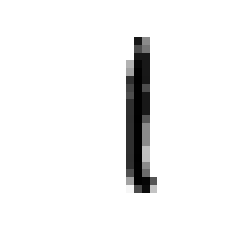

[0]


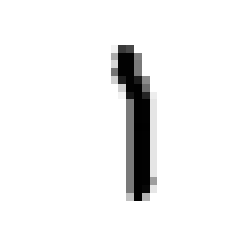

In [18]:
plot_digit(X_train_tr[:,1005])
print(y_train_shifted[:,1005])
plot_digit(X_train_tr[:,8000])
print(y_train_shifted[:,8000])
plot_digit(X_train_tr[:,456])
print(y_train_shifted[:,456])
plot_digit(X_train_tr[:,567])
print(y_train_shifted[:,567])

Xtrain = X_train_tr
ytrain = y_train_shifted

plot_digit(Xtrain[:,1005])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


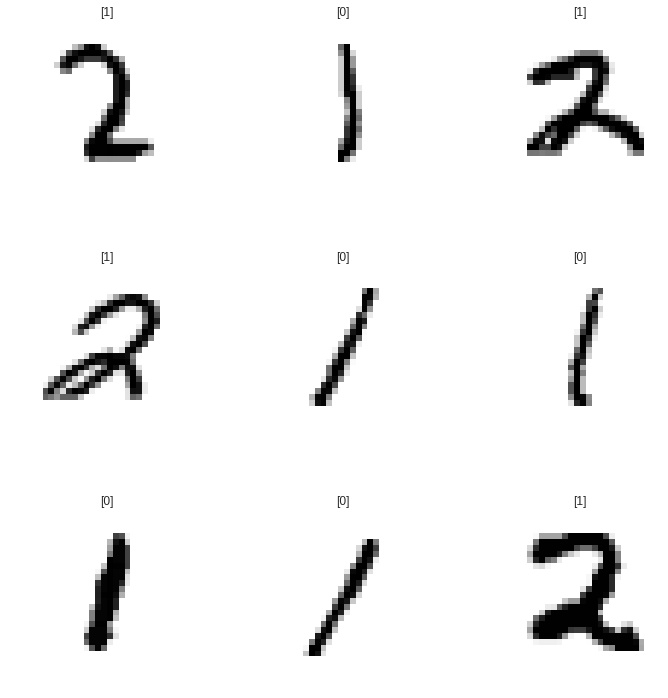

In [19]:
f = plt.figure(figsize=(12,12));
count = 1
for i in sample(range(12000), 9):
    #randint(1, 12000),randint(1, 12000),randint(1, 12000),randint(1, 12000),randint(1, 12000),randint(1, 12000)]:
    plt.subplot(3,3,count)
    count = count + 1
    plt.subplots_adjust(hspace=0.5)
    plt.title(ytrain[:,i])
    some_digit_image = Xtrain[:,i].reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    pass

# Tensorflow Implementation

In [0]:
import tensorflow as tf

In [21]:
print(Xtrain.shape)
print(ytrain.shape)

(784, 12700)
(1, 12700)


In [23]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())

#W = tf.Variable(tf.random_normal([1, n_dim]))/1000.0
W = tf.Variable(tf.zeros([1, n_dim]))
#b = tf.Variable(tf.random_normal([1]))/10.0
b = tf.Variable(tf.zeros(1))

init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
y_ = tf.sigmoid(tf.matmul(W,X)+b)
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
def run_logistic_model(learning_r, training_epochs, train_obs, train_labels, debug = False):
    sess = tf.Session()
    sess.run(init)
    
    cost_history = np.empty(shape=[0], dtype = float)

    for epoch in range(training_epochs+1):
        
        sess.run(training_step, feed_dict = {X: train_obs, Y: train_labels, learning_rate: learning_r})

        cost_ = sess.run(cost, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)
        
        if (epoch % 50 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))
            
    return sess, cost_history

In [28]:
sess = tf.Session()
sess.run(init)
print(sess.run(y_, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 2}))
print(sess.run(cost, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 2}))
sess.close()

[[0.5 0.5 0.5 ... 0.5 0.5 0.5]]
0.6931471


In [29]:
sess, cost_history1 = run_logistic_model(learning_r = 0.01, 
                                training_epochs = 200, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True)

Reached epoch 0 cost J = 0.678590
Reached epoch 50 cost J = 0.346051
Reached epoch 100 cost J = 0.248148
Reached epoch 150 cost J = 0.201335
Reached epoch 200 cost J = 0.173339


In [30]:
sess, cost_history2 = run_logistic_model(learning_r = 0.005, 
                                training_epochs = 500, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True) 

Reached epoch 0 cost J = 0.685825
Reached epoch 50 cost J = 0.455052
Reached epoch 100 cost J = 0.348151
Reached epoch 150 cost J = 0.287835
Reached epoch 200 cost J = 0.249138
Reached epoch 250 cost J = 0.222057
Reached epoch 300 cost J = 0.201924
Reached epoch 350 cost J = 0.186287
Reached epoch 400 cost J = 0.173737
Reached epoch 450 cost J = 0.163404
Reached epoch 500 cost J = 0.154723


# Plot of the cost function vs. the number of epochs

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


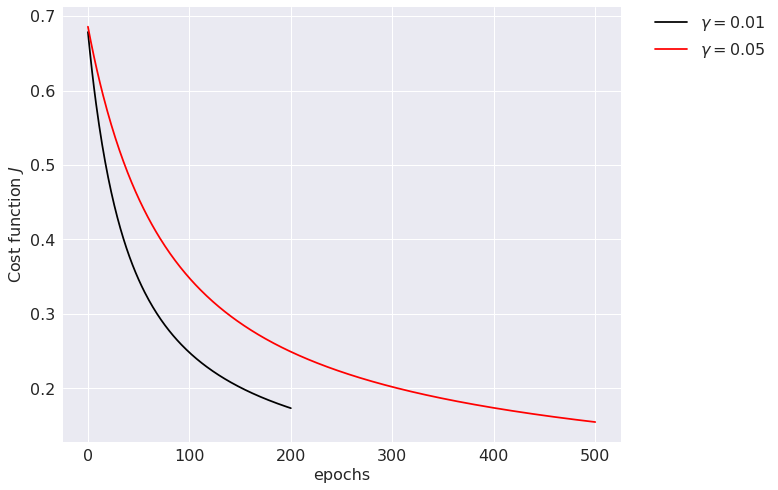

In [31]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history1, ls='solid', color = 'black', label = '$\gamma = 0.01$')
ax.plot(cost_history2, ls='solid', color = 'red', label = '$\gamma = 0.05$')
ax.set_xlabel('epochs', fontsize = 16)
ax.set_ylabel('Cost function $J$', fontsize = 16)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.tick_params(labelsize=16)

**CAREFUL** it will take some time to run!

In [0]:
sess, cost_history = run_logistic_model(learning_r = 0.05, 
                                training_epochs = 750, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True)

Reached epoch 0 cost J = 0.623632
Reached epoch 250 cost J = 0.071436
Reached epoch 500 cost J = 0.054990
Reached epoch 750 cost J = nan


In [0]:
sess, cost_history = run_logistic_model(learning_r = 1e-3, 
                                training_epochs = 1500, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True)

Reached epoch 0 cost J = 0.691670
Reached epoch 250 cost J = 0.457857
Reached epoch 500 cost J = 0.349886
Reached epoch 750 cost J = 0.289003
Reached epoch 1000 cost J = 0.249949
Reached epoch 1250 cost J = 0.222616
Reached epoch 1500 cost J = 0.202293


In [32]:
correct_prediction1=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))

accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))

print(sess.run(accuracy1, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))

0.97346455


In [0]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history, ls='solid', color = 'black', label = '$\gamma = 0.001$')
ax.set_xlabel('epochs', fontsize = 16)
ax.set_ylabel('Cost function $J$', fontsize = 16)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.tick_params(labelsize=16)

In [34]:
print(sess.run(y_, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))
print(sess.run(tf.greater(y_, 0.5), feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))
print(sess.run(tf.less(y_, 0.5), feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))

[[0.13890961 0.938568   0.15331501 ... 0.9679675  0.9059902  0.22339767]]
[[False  True False ...  True  True False]]
[[ True False  True ... False False  True]]


## Logistic Regression with sklearn

As a side note, here is the code to see how easy it is in comparison to do the same with the sklearn library... 

In [0]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

In [0]:
XX = Xtrain.T
YY = ytrain.T.ravel()

logistic.fit(XX,YY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
logistic.score(XX,YY)

0.99582968991726639

The score is calculated as 

In [0]:
sum(logistic.predict(XX) == YY) / len(XX)

0.99582968991726639

Check: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 